<a href="https://colab.research.google.com/github/prateekshapm/machine_learning/blob/main/SVM_04_09_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
#loading the data
cancer_data=datasets.load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer_data.data,cancer_data.target,test_size=0.4,random_state=209)
#generating the model using linear kernal
cls=svm.SVC(kernel="linear")
#train the model
cls.fit(x_train,y_train)
#predict the response
pred=cls.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("Precision:",metrics.precision_score(y_test,y_pred=pred))
#recall score
print("Recall:",metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test,y_pred=pred))


accuracy: 0.9254385964912281
Precision: 0.9333333333333333
Recall: 0.9402985074626866
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        94
           1       0.93      0.94      0.94       134

    accuracy                           0.93       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



Accuracy: 0.84
Accuracy: 0.96


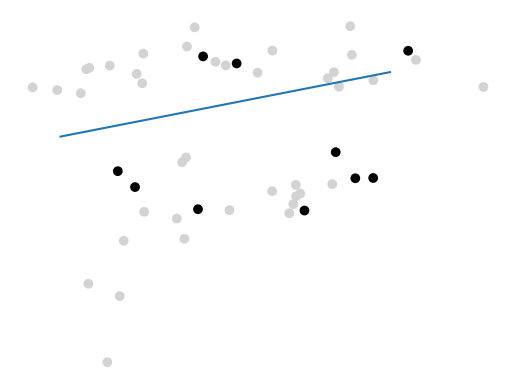

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split

classes = 4
X,t= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)
#%%
X_train, X_test, y_train, y_test=  train_test_split(X, t , test_size=0.50)
#%%
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
#%%
model.fit(X_train, y_train)
#%%
y=model.predict(X_test)
y2=model.predict(X_train)
#%%
from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print('Accuracy:',score)
score2 =accuracy_score(y2, y_train)
print('Accuracy:',score2)
#%%
import matplotlib.pyplot as plt
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)
# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

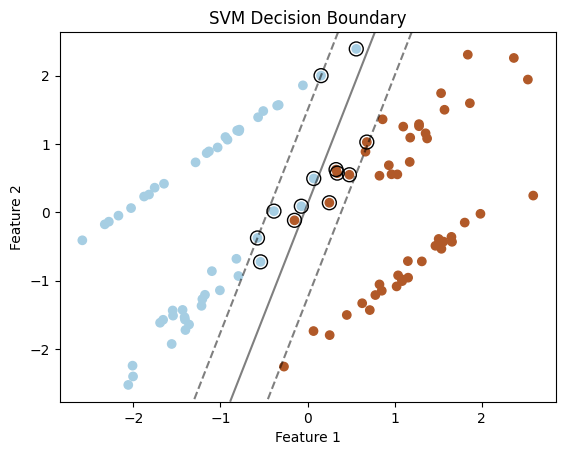

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Generate some random data for classification
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the classifier on the data
clf.fit(X, y)

# Get the support vectors and plot them
support_vectors = clf.support_vectors_
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the classifier
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.show()


Accuracy: 50.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


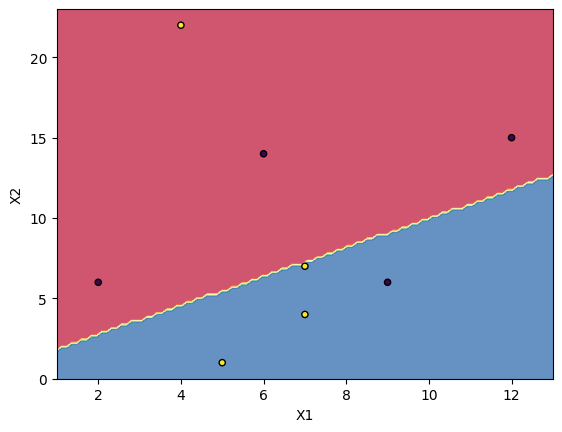

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay

# Read the data from an Excel sheet
data = pd.read_excel('/content/new.xlsx')

# Split the data into features (X) and labels (y)
X = data[['X1', 'X2']]
y = data['Label_column']  # Replace 'Label_column' with the actual name of your label column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (you can choose the kernel and other hyperparameters)
clf = SVC(kernel='linear')

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    clf,
    X.values,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel='X1',
    ylabel='X2',
)

# Scatter plot
plt.scatter(X['X1'], X['X2'], c=y, s=20, edgecolors="k")
plt.show()